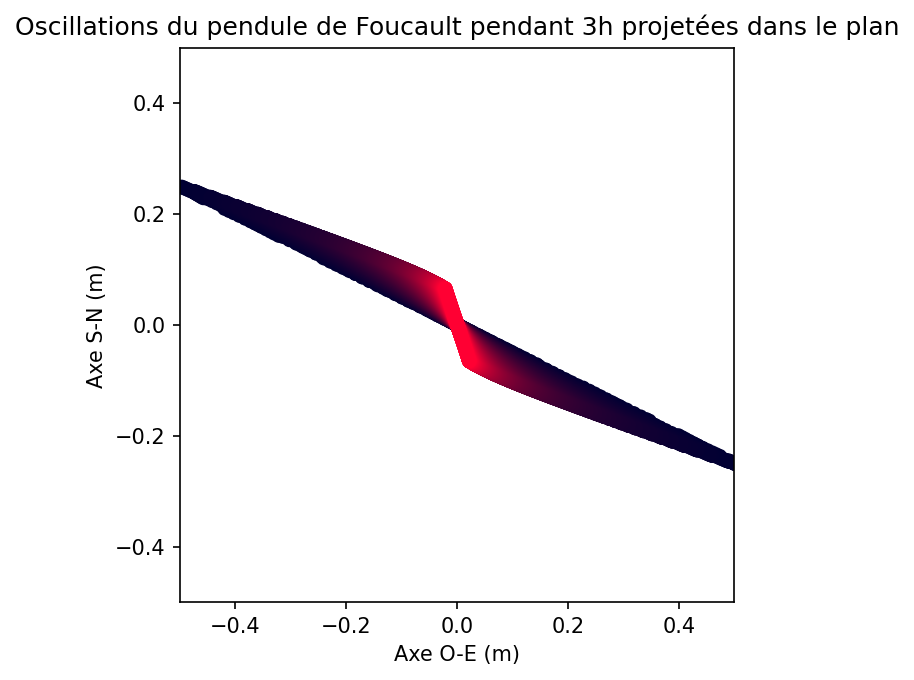

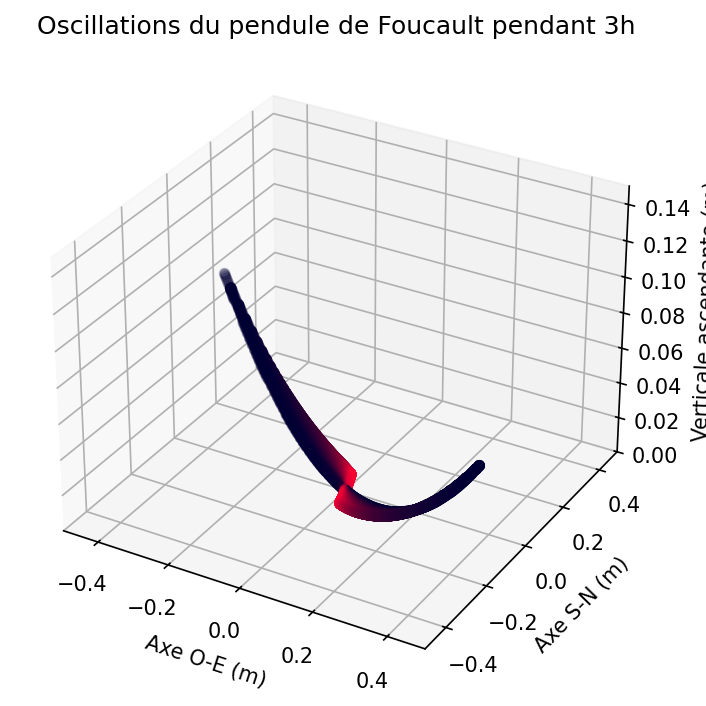

-13.82360863216142


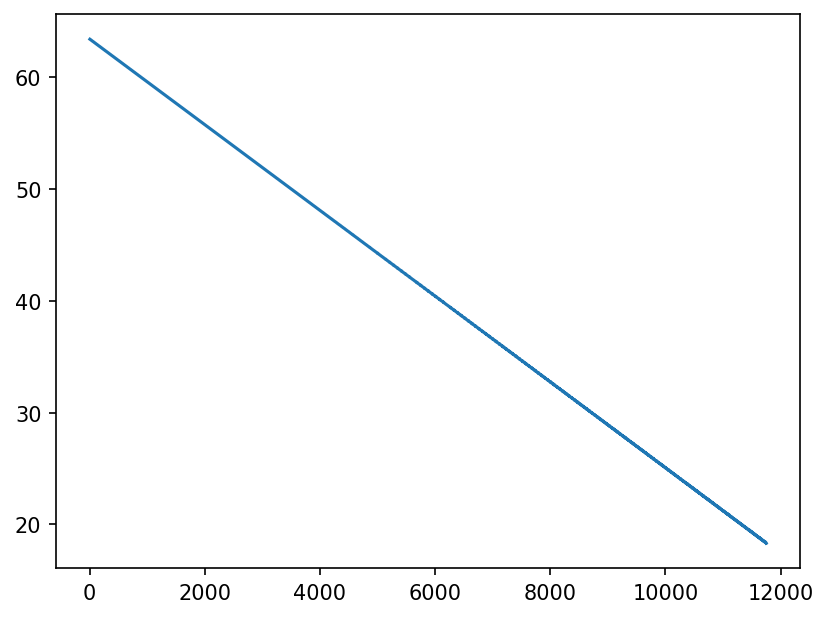

In [3]:
from scipy.integrate import solve_ivp
import numpy as np
from math import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.dpi'] = 150

l = 2.2
omega = 7.2921e-5
lamb = 43.6109/180*2*pi
Cx = 0.5
pi = 3.14159
d = 10e-2
pair = 1.18
m = 4
g=9.81
sigma = -1/4*Cx*pi*(d**2)*pair
T=m*g

temps = 3
step = 0.5

# Conditions initiales
x0 = 0.5
y0 = -0.25
ux0 = 0.0
uy0 = 0


# Système d'équations différentielles
def systeme(t, Y):
    x = Y[0]
    y = Y[1]
    ux = Y[2]
    uy = Y[3]

    dx_dt = ux
    dy_dt = uy
    
    dux_dt = -2*omega*(-uy*sin(lamb))+ux*sigma/m*sqrt(ux**2+uy**2)-T*x/(m*l)
    duy_dt = -2*omega*(ux*sin(lamb))+uy*sigma/m*sqrt(ux**2+uy**2)-T*y/(m*l)

    return [dx_dt, dy_dt, dux_dt, duy_dt]

# Résolution

solution = solve_ivp(systeme, [0, temps*3600], [x0, y0, ux0, uy0], method='RK45', max_step=step)

x=np.array(solution['y'][0])
y=np.array(solution['y'][1])
z = l -np.sqrt(l**2-x**2-y**2)
couleur = [(i/len(x), 0, 0.2) for i in range(len(x))]
plt.title(f"Oscillations du pendule de Foucault pendant {temps}h projetées dans le plan")
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
plt.xlabel("Axe O-E (m)")
plt.ylabel("Axe S-N (m)")
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')


# Plot en 2D
plt.scatter(x,y, color=couleur)
plt.savefig(f"pff_{temps}_plan.png")
plt.show()

# Plot en 3D
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')  # Affichage en 3D
ax.scatter(x, y, z, c=couleur)
plt.title(f"Oscillations du pendule de Foucault pendant {temps}h")
ax.set_xlabel('Axe O-E (m)')
ax.set_ylabel('Axe S-N (m)')
ax.set_zlabel('Verticale ascendante (m)')
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)
ax.set_zlim(0,0.15)
fig.tight_layout()
plt.savefig(f"pff_{temps}_3d.png")
plt.show()

tps = [step*i for i in range(len(x))]
rayon = [ sqrt(x[i]**2 + y[i]**2) for i in range(len(x))]

dr = [(rayon[i+1]-rayon[i])/step for i in range(len(x)-1)]



j = 0
alpha = []
tps2 = []
for i in range(len(x)-2):
  
    #print(int(dr[i+1]/abs(dr[i+1])))
    if int(dr[i]/abs(dr[i])) != int(dr[i+1]/abs(dr[i+1])):
        #print(x[i])
        j += 1 
        if j%2 == 0: 
            if j %4 == 2:
                last = (x[i], y[i])
            if j %4 == 0 :
                tps2.append(i*step)
                alpha.append(-np.arctan((x[i]-last[0])/(y[i]-last[1]))*180/np.pi)
fit = np.polyfit(tps2, alpha,1 )
print(fit[0]*3600)
plt.plot(tps2, alpha)
plt.show()
    
